In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/corrected_data.csv')
data.head()

,property_name,seller,facilities,advantages,column0,column1,column2,column3,column4,column5,floors,units,total project area,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


# Univariate Analysis

In [ ]:
data.rename(columns={'column0':'BHK','column1':'property_type','column2':'Area_type',
                     'column3':'avg_sba','column4':'area_sqft','column5':'Avg_prics',
                     'total project area':'tpa'},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_name  361 non-null    object 
 1   seller         361 non-null    object 
 2   facilities     361 non-null    int64  
 3   advantages     317 non-null    float64
 4   BHK            361 non-null    int64  
 5   property_type  361 non-null    object 
 6   Area_type      361 non-null    object 
 7   avg_sba        361 non-null    float64
 8   area_sqft      361 non-null    object 
 9   Avg_prics      342 non-null    float64
 10  floors         349 non-null    float64
 11  units          345 non-null    float64
 12  tpa            339 non-null    float64
 13  towers         338 non-null    float64
 14  open area      84 non-null     object 
 15  address        361 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 45.2+ KB


In [ ]:
# proprerty_name -> Object(It is okay)
# seller -> Object(Column with high cardinality)
# Facility -> int64 with no null values(score of the available facilities)
# advantages -> float64(mean of the distance from the various important stations)
#  BHK -> one of the important columns(speculative) BHK information
# property_type -> extracted only apartment  information
# Area_type -> here all the information present should be of sba
# area_sqft -> are in sq.m
# Avg_prics -> output column(It is the average of the price range)
# floors -> number of floor information(It should be int64)
# units -> no of units
# tpa -> total project area
# towers -> number of towers in the present in that particular area
# open are -> most of the null values(Object)
# address -> this should be converted into some numerical value since we are making predictive model.


In [ ]:
#plt.figure(figsize=(15,20))
data['property_name'].value_counts().sort_values(ascending=False).shape

(196,)

<Axes: >

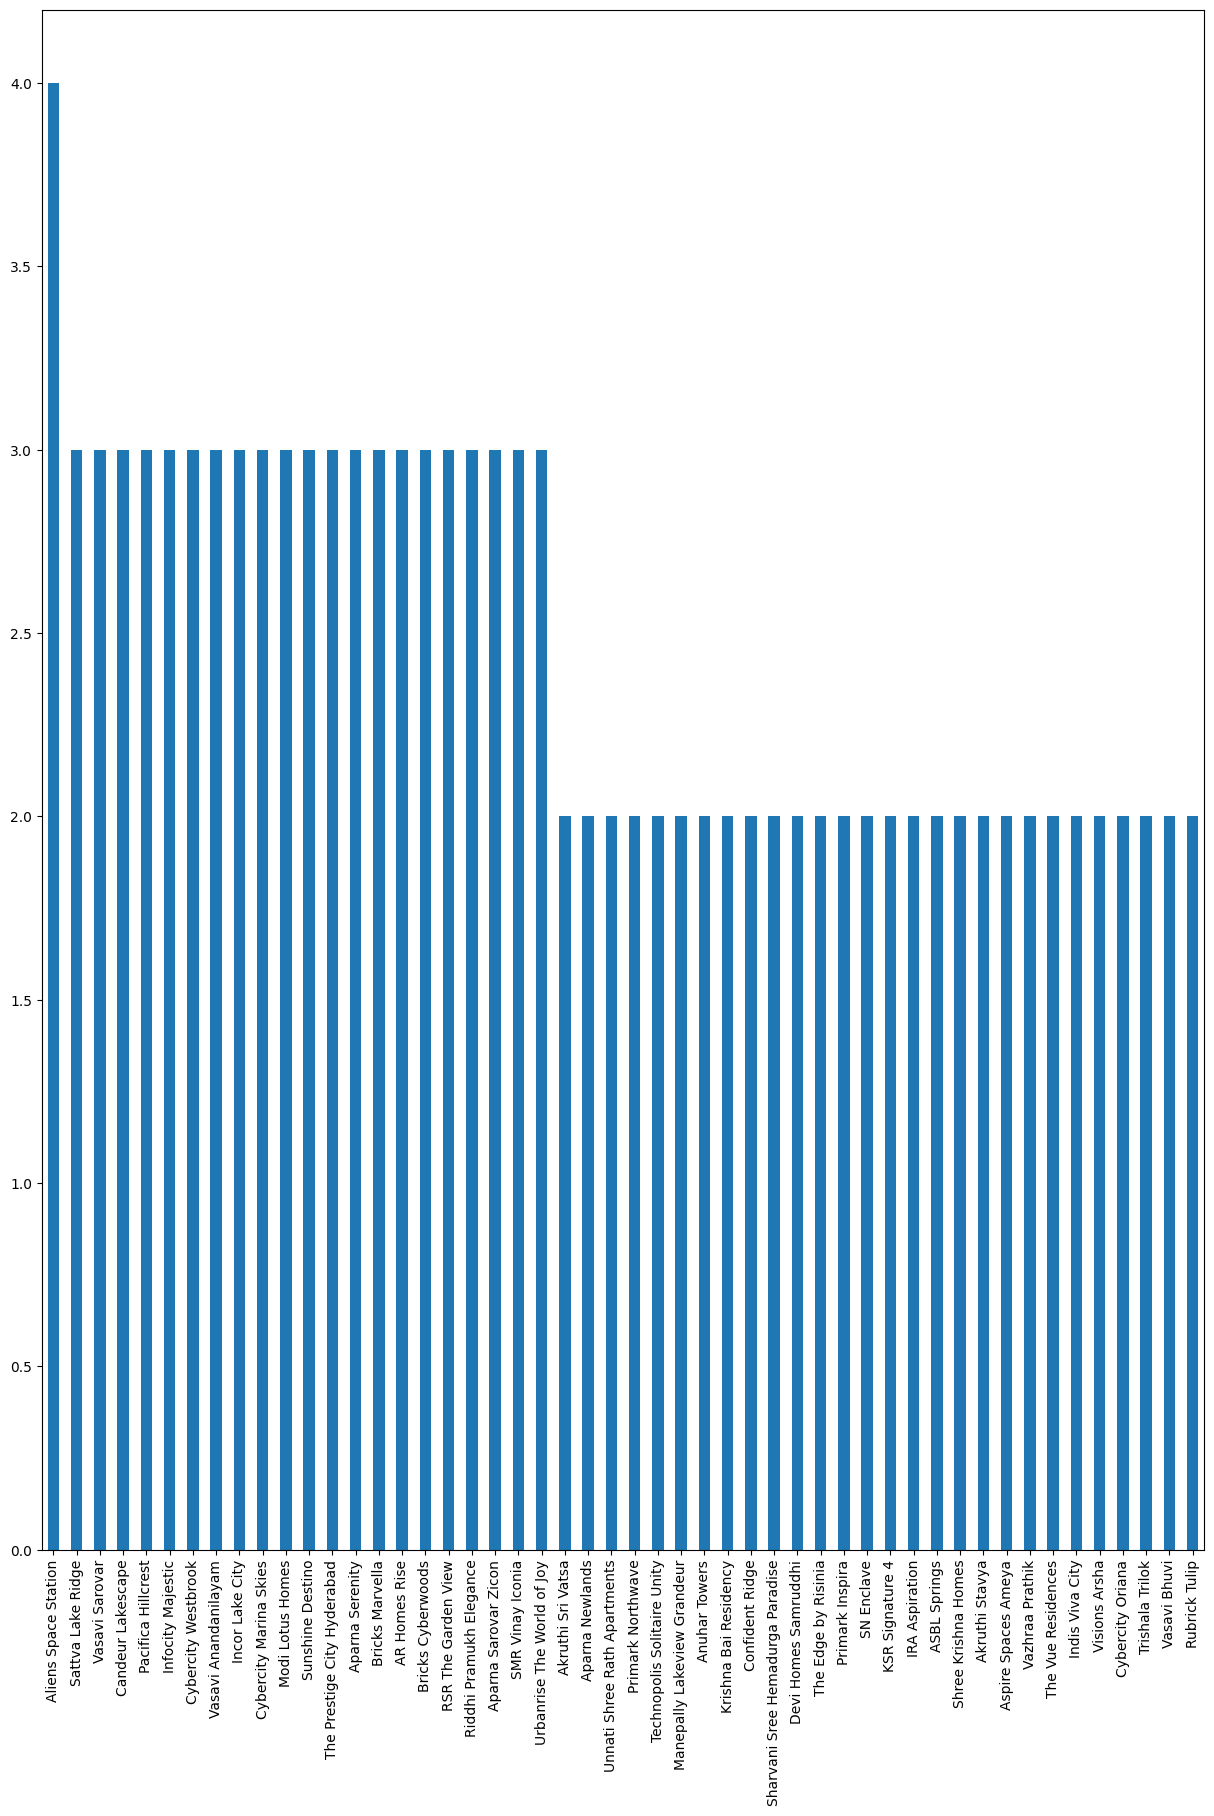

In [ ]:
plt.figure(figsize=(15,20))
data['property_name'].value_counts().sort_values(ascending=False)[:50].plot(kind='bar')

-  High Cardinality in property_name column and It shows number of projects run simultaneouslyby the builder
- No missing values

<Axes: >

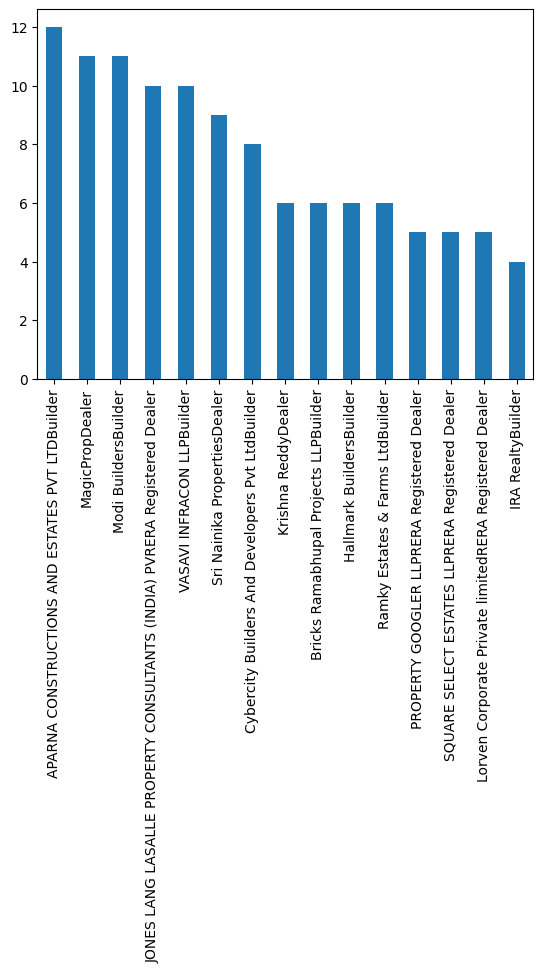

In [ ]:
data['seller'].value_counts().sort_values(ascending=False)[:15].plot(kind='bar')

- These builder dominate the marker and I am speculative that the price will have relation with this column
- No missing values

<Axes: xlabel='facilities', ylabel='Density'>

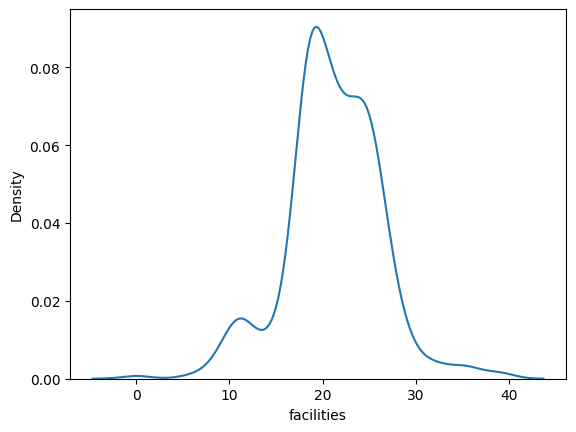

In [ ]:
sns.kdeplot(data['facilities'])

<Axes: xlabel='facilities', ylabel='Count'>

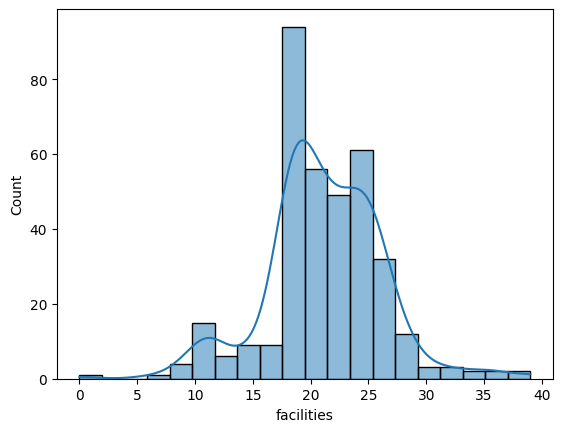

In [ ]:
sns.histplot(data['facilities'],kde=True,fill=True)

<Axes: xlabel='facilities'>

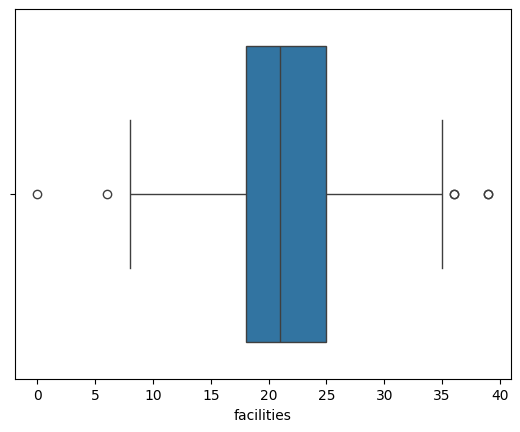

In [ ]:
sns.boxplot(x=data['facilities'])

In [ ]:
data['facilities'].skew()

-0.1002912494498361

In [ ]:
data['facilities'].kurtosis()

1.7232192208939439

- This columns does follow kind of normal distribution
- Most of the scores does fall in the range.
- Some outliers detected
- Acceptable skewness and kurtosis values.

<Axes: xlabel='advantages', ylabel='Count'>

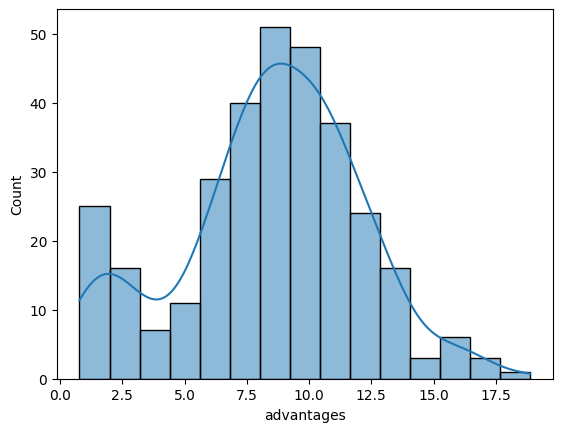

In [ ]:
sns.histplot(data['advantages'],kde=True)

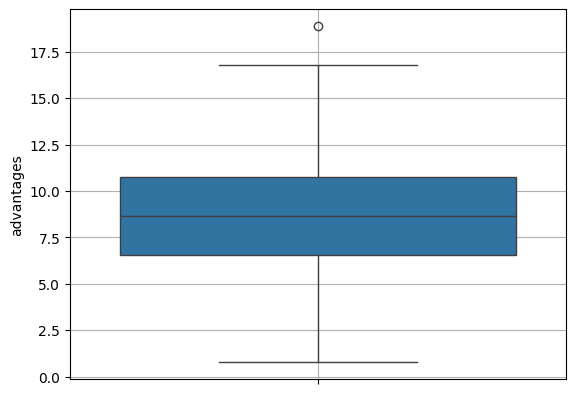

In [ ]:
sns.boxplot(data['advantages'])
plt.grid()

In [ ]:
data['advantages'].describe()

count    317.000000
mean       8.446709
std        3.623838
min        0.782143
25%        6.545000
50%        8.646154
75%       10.775000
max       18.885714
Name: advantages, dtype: float64

- Looks bimodal data, make have to apply tranformation on the data.

In [ ]:
data.head(2)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"


<Axes: >

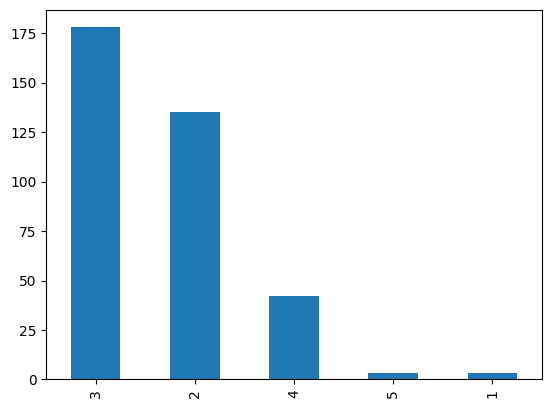

In [ ]:
data['BHK'].value_counts().plot(kind='bar')

In [ ]:
data.head(2)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"


In [ ]:
data['property_type'].value_counts()

Apartment    361
Name: property_type, dtype: int64

<Axes: >

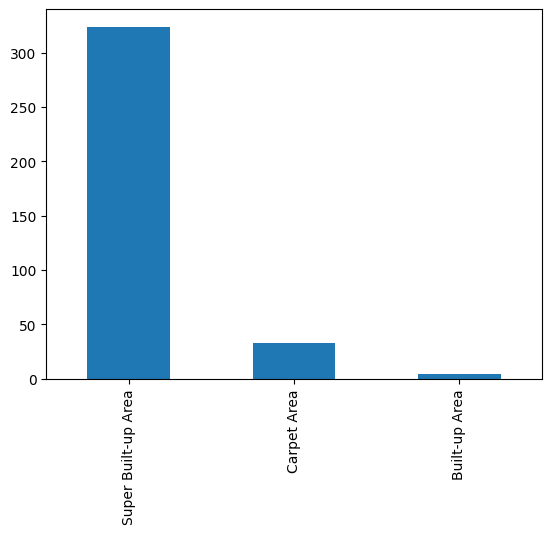

In [ ]:
data['Area_type'].value_counts().plot(kind='bar')

- We need to have built-up area in our data.
- The built-up area is the sum of the carpet area and the area of both the exterior and interior walls, balcony, the exterior staircase, and other liveable areas if any.
- Super built-up area is referred to as the ‘saleable area’ and homebuyers are usually charged based on this value.
- The area of an apartment that can be covered by a carpet or the net usable area is known as the carpet area

In [ ]:
data.head(2)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"


In [ ]:
data['avg_sba']

0      1362.5
1      1652.5
2      2140.0
3      1420.0
4      1850.0
        ...  
356    3166.0
357    1168.0
358    1560.0
359    1265.0
360    2020.0
Name: avg_sba, Length: 361, dtype: float64

<Axes: xlabel='avg_sba', ylabel='Count'>

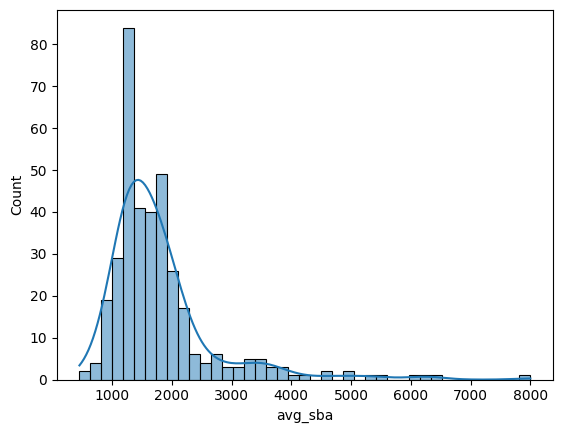

In [ ]:
sns.histplot(data['avg_sba'],kde=True)

<Axes: ylabel='avg_sba'>

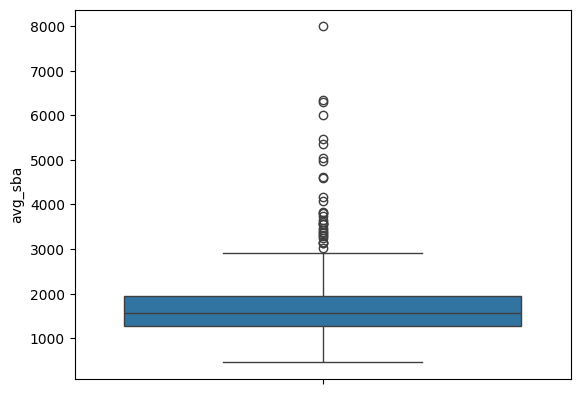

In [ ]:
sns.boxplot(data['avg_sba'])

In [ ]:
data['avg_sba'].describe()

count     361.000000
mean     1796.854109
std       922.651564
min       455.000000
25%      1270.000000
50%      1562.500000
75%      1937.500000
max      8001.000000
Name: avg_sba, dtype: float64

In [ ]:
print('Skewness - ',data['avg_sba'].skew())
print('Kurtosis - ',data['avg_sba'].kurtosis())

Skewness -  2.8239097328857796
Kurtosis -  10.982325654434357


- There are outliers in the data, mean is around 1796 sq.ft.
- max is 8001, which needs to be corrected.
- std is more.
- Almost normally distributed.
- Skewness values is acceptable, but high kurtosis, which shows tails are fatter and more number of outliers are present.

In [ ]:
data.head()

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


In [ ]:
data['Avg_prics'].isna().sum()

19

In [ ]:
data['Avg_prics'].describe()

count    342.000000
mean       1.443054
std        1.137518
min        0.256650
25%        0.811438
50%        1.082800
75%        1.615000
max        8.800000
Name: Avg_prics, dtype: float64

<Axes: xlabel='Avg_prics', ylabel='Count'>

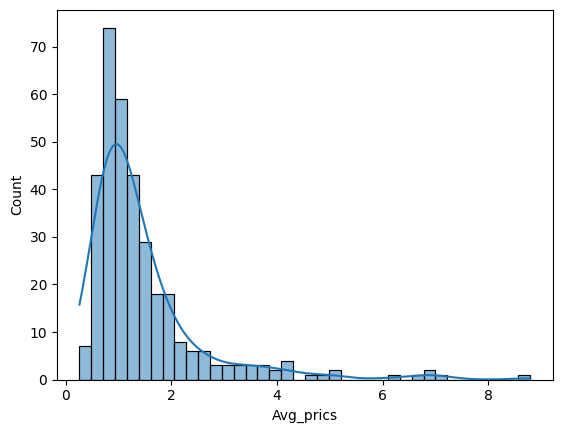

In [ ]:
sns.histplot(data['Avg_prics'],kde=True)

- There are 19 null values which needs to be imputed as per the present data.
- looks like almost normally distrubuted.

In [ ]:
data.head()

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


In [ ]:
data['floors'].isnull().sum()

12

In [ ]:
data['floors'].describe()

count    349.000000
mean      17.309456
std       12.118498
min        2.000000
25%        9.000000
50%       14.000000
75%       26.000000
max       55.000000
Name: floors, dtype: float64

<Axes: >

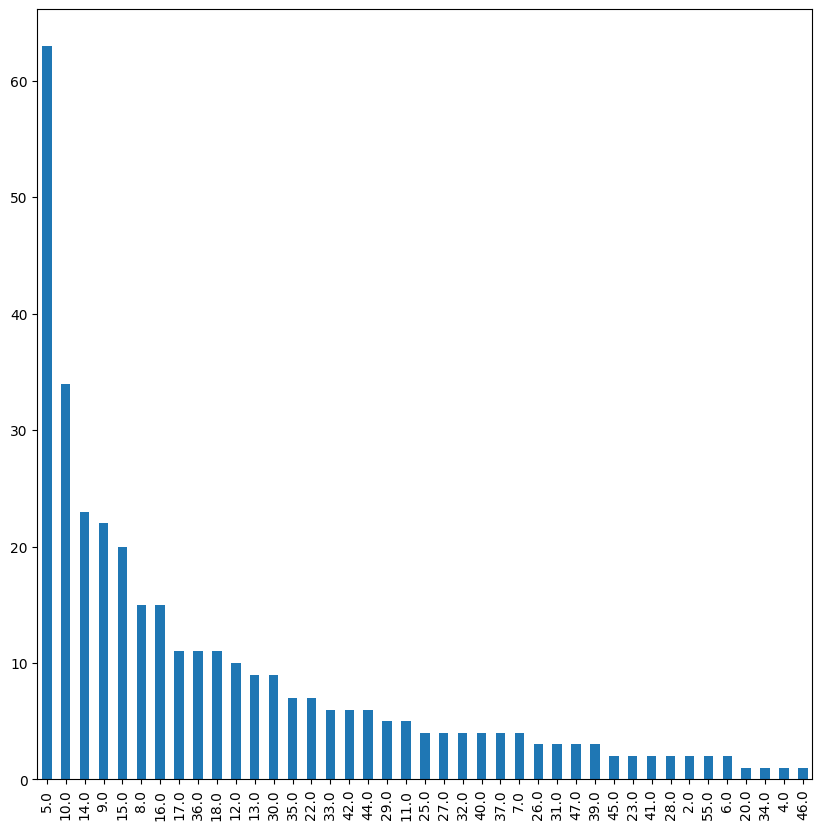

In [ ]:
plt.figure(figsize=(10,10))
data['floors'].value_counts().plot(kind='bar')

- Number of floors in an Apartment and it shows more number of apartments are of 5.
- It should a categorical column.

In [ ]:
data.head()

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


In [ ]:
data['units'].isnull().sum()

16

<Axes: xlabel='units', ylabel='Count'>

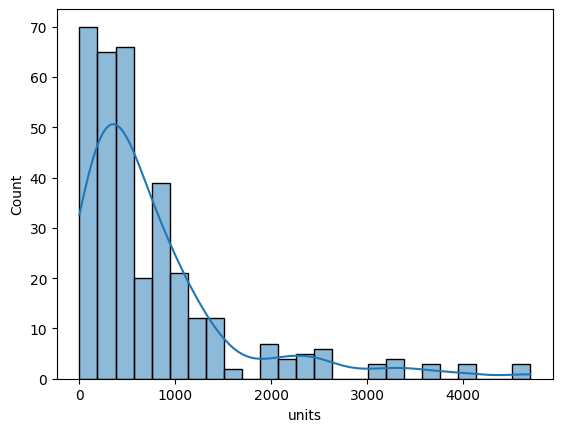

In [ ]:
sns.histplot(data['units'],kde=True)

- more number of units are between 0 - 1000
- almost normally distributed.

In [ ]:
data.head()

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


In [ ]:
data['tpa'].isnull().sum()

22

In [ ]:
data['tpa'].describe()

count    339.000000
mean       6.922413
std        7.905829
min        0.065083
25%        2.600000
50%        4.700000
75%        8.005000
max       55.150000
Name: tpa, dtype: float64

<Axes: xlabel='tpa', ylabel='Count'>

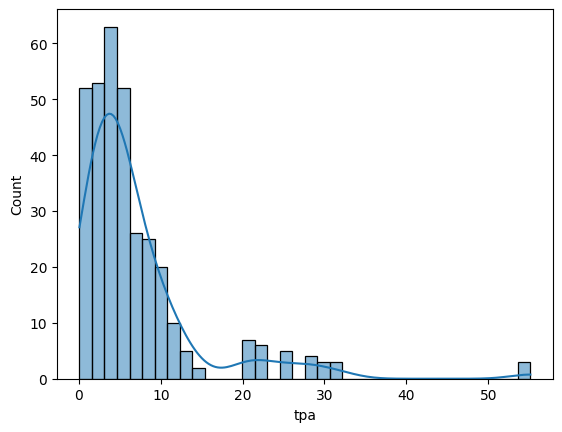

In [ ]:
sns.histplot(data['tpa'],kde=True)

<Axes: ylabel='tpa'>

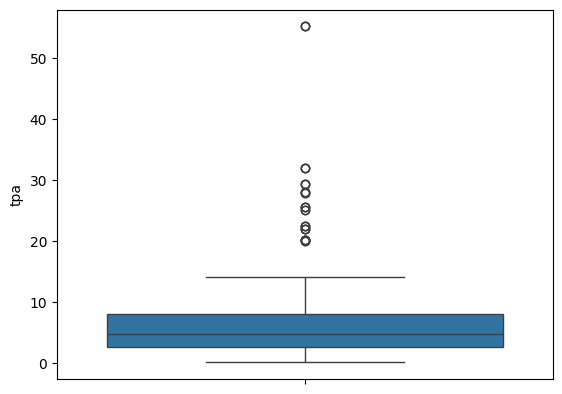

In [ ]:
sns.boxplot(data['tpa'])

In [ ]:
data.head()

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565000,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
2,The Olympus,Sumadhura Infracon Pvt. Ltd.Builder,27,7.209091,3,Apartment,Super Built-up Area,2140.0,(186.74 - 210.89 sq.m.),2.4000,NaN,856.0,5.060,2.0,NaN,"nanakramguda,hyderabad"
3,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,2,Apartment,Super Built-up Area,1420.0,(113.81 - 150.04 sq.m.),1.1800,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"
4,Technopolis Solitaire Unity,TECHNOPOLIS CONSTRUCTION COMPANY PVT LTDBuilder,21,6.225000,3,Apartment,Super Built-up Area,1850.0,(130.06 - 213.68 sq.m.),1.5350,16.0,352.0,2.240,1.0,NaN,"kondapur,hyderabad"


In [ ]:
data['towers'].isnull().sum()

23

In [ ]:
data['towers'].describe()

count    338.00000
mean       5.54142
std        9.35421
min        1.00000
25%        2.00000
50%        4.00000
75%        6.00000
max       83.00000
Name: towers, dtype: float64

<Axes: xlabel='towers', ylabel='Count'>

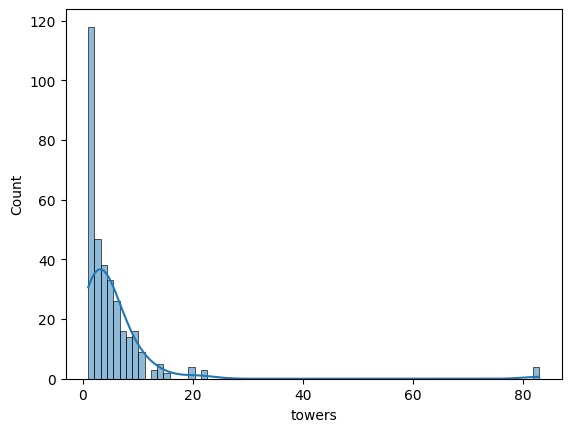

In [ ]:
sns.histplot(data['towers'],kde=True)

- We are speculative the most of the columns follow chi-square distribution, need to perform tests on the data to check with the distribution confirmation.

# Multi-Variate Analysis

In [ ]:
data.head(2)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"


<Axes: xlabel='facilities', ylabel='Avg_prics'>

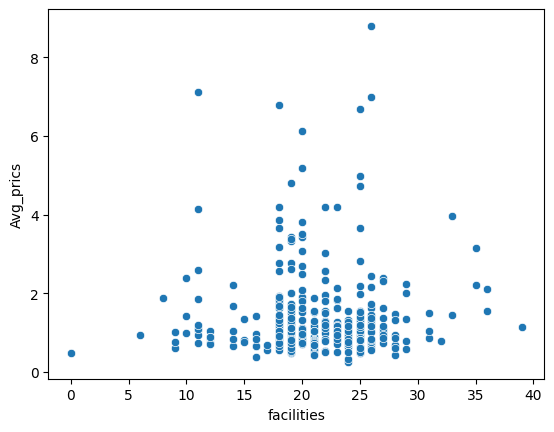

In [ ]:
sns.scatterplot(x=data['facilities'],y=data['Avg_prics'])

- There is not a linear relationship between the prices and facilities, though we can say that high prices should include better facility score.

<Axes: xlabel='advantages', ylabel='Avg_prics'>

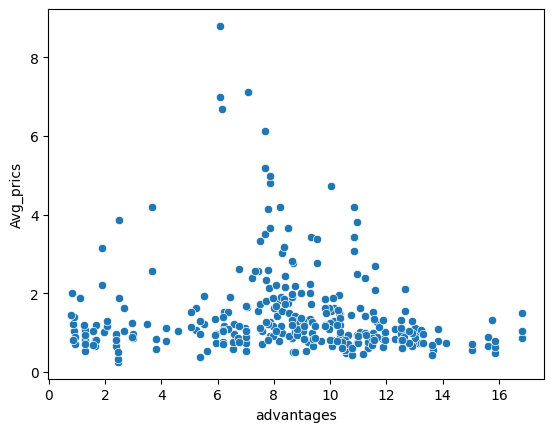

In [ ]:
sns.scatterplot(x=data['advantages'],y=data['Avg_prics'])

- No linear relationship but the high prices should include better advantages which has better vicinity, availability of the school and other facilities.

<Axes: xlabel='BHK', ylabel='Avg_prics'>

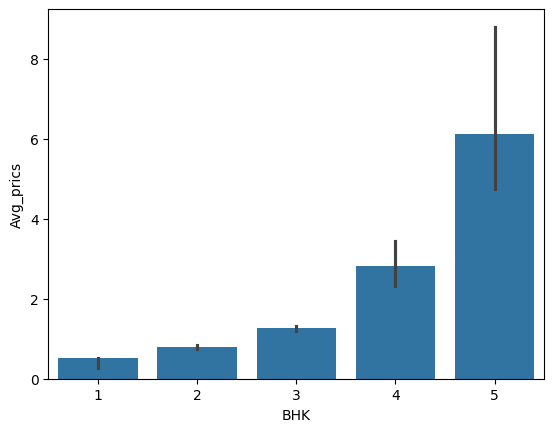

In [ ]:
sns.barplot(x=data['BHK'],y=data['Avg_prics'],estimator=np.median)

- Higher prices for BHK, which will include larger area.

In [ ]:
data.head(2)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
0,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,2,Apartment,Super Built-up Area,1362.5,(119.38 - 133.78 sq.m.),0.9749,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"
1,Sumadhuras Gardens By The Brook,Sumadhura Infracon Pvt. Ltd.Builder,19,6.565,3,Apartment,Super Built-up Area,1652.5,(150.97 - 156.08 sq.m.),1.2300,14.0,908.0,9.625,8.0,NaN,"shamshabad,hyderabad"


<Axes: xlabel='avg_sba', ylabel='Avg_prics'>

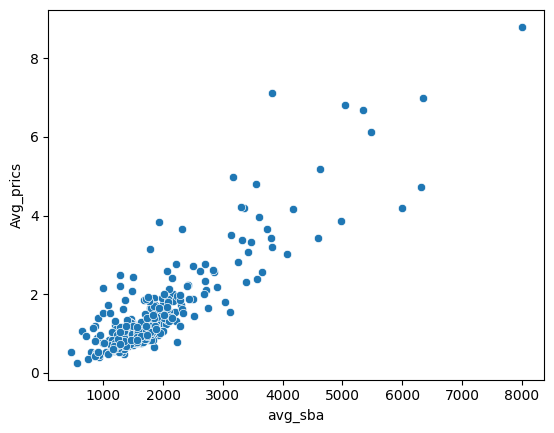

In [ ]:
sns.scatterplot(x=data['avg_sba'], y = data['Avg_prics'])

# As per our guess sqft column has linear relationship with the price column

In [ ]:
data.sample(1)

,property_name,seller,facilities,advantages,BHK,property_type,Area_type,avg_sba,area_sqft,Avg_prics,floors,units,tpa,towers,open area,address
176,Makuta Horizon,Makuta Developers LLPBuilder,20,11.6,3,Apartment,Super Built-up Area,1478.0,(266.16 sq.m.),2.09,16.0,64.0,6.56,1.0,75 %,"kompally,hyderabad"
